# "Electric Field of a Charge Distribution"

The goal of the project is to define a function of electric potential, and create an image of the resulting electric field, $\vec E$,  given a certain charge distribution. 

There are several steps that must be taken to accomplish this. A good starting point is to define what functions are going to be important to complete the task. In Electrodynamics, a charge distribution is over some interval is given by:

$$V=k\int\frac{dq}{r}\,,$$

Where:
- k is the electrostatic constant $k=8.99\times10^{9}$ V$\cdot$m$\cdot$C$^{-1}$
- dq is the change in point charges
- r is radius from each point charge

where V is measured in volts. Note that there is a contrast between this formula and the one for a potential at a certain distance from the point charge given by: 

$$V=k\frac{q}{r}\,,$$

The point charge distribution is not just a single value, it is a summation of all potential values over an interval. The electric field is then: $\vec{E}=-\nabla V$

The above equations only deal with this potential in one case. A proper electric field is a 2-D plot, which is going to be slightly different to calculate. Because of this, a double integral is needed where dq is replaced by the differential with respect to x and y space. The double integral is given by:


$$V(x,y)=k\int_{-L}^L\int_{-L}^{L} \frac{\sigma(x^\prime,y^\prime)}{\sqrt{(x-x^\prime)^2+(y-y^\prime)^2}}\,dx^\prime dy^\prime\,,$$

where the electrostatic constant will be made equal to 1 for simplicity for in this project. The values for L can be virtually anything from negative to postive infinity (including infinity itself).  

The first part of this project is to create this integration function. It will be able to handle the double integration on a 200 by 200 grid of x and y values. In order to find $\vec E$, this function needs to reprsent $V(x,y)$ as it takes in a high resolution 2-D array. There will be a double integral for every single point in a 1-D array that is in ANOTHER 1-D array. 

Imports for this project from scipy.integration are especially important:

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.integrate as integrate
from IPython import display

In [6]:
@np.vectorize #allows functions to be passed through variables
def simps2D(f, L):
    x = np.linspace(-L, L, 200)
    y = np.linspace(-L, L, 200)
    X, Y = np.meshgrid(x, y)
    a = f(X, Y) #grid for integration format
    b = integrate.simps(a, x, y)
    c = integrate.simps(b, x, y) #second integrals evaluates result from first
    return c


Important to note is the fact that the function takes in arrays for x and y. This is significant in the sense that the code will run faster than if it were just funcition values being integrated. 

The next step is to create a function that will take in the 2-D charge distribution and then have it integrated with the function written above. Sigma is the notation for this function and it takes in x and y input.

In [7]:
@np.vectorize
def potential(sigma, x, y):
    def f(dx, dy):
        return sigma(dx, dy)/np.sqrt((x - dx)**2 + (y - dy)**2)
    
    return simps2D(f, 10) #returns electric potential at point


For simplicities sake, we can set sigma equal to a specific function to obtain a result to be used to plot the electric field. The sigma function is going to be a sinusoidal function so it can easily be plotted:

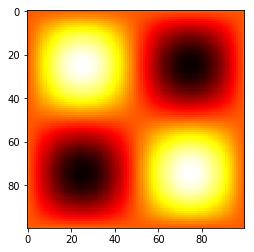

In [10]:
def sigma(x, y):
    return np.sin(1/2*np.pi*x)*np.sin(1/2*np.pi*y)
    
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)    

plt.imshow(sigma(X, Y), cmap = "hot")
plt.show()


Now we can actually define our electric potential function. A set of x and y arrays must be used to pass though sigma and this will create a function that we can then use to plot out how the electric potential looks. 

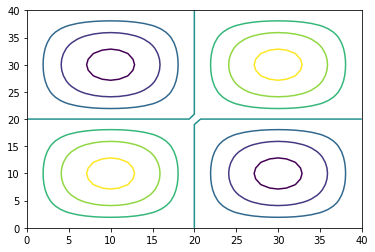

In [9]:
x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x, y)
V = potential(sigma, X, Y)

plt.contour(V)
plt.show()


The last part of this project is to show how the electric field will look like with the given electric potential plotted previously. The arrows that are going to be plotted over the imshow/contour map show the direction of the field at certain points. 

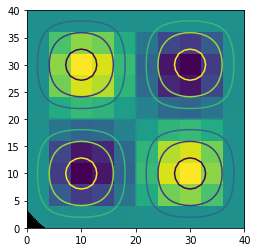

In [22]:
plt.imshow(sigma(X, Y), extent = (0, 40, 0, 40))

plt.contour(V, extent = (0, 40, 0, 40))

x_range = np.linspace(0, 40, 1)
y_range = np.linspace(0, 40, 1)
X,Y = np.meshgrid(x_range, y_range)
Ex, Ey = np.gradient(-V, 0.1)

plt.quiver(X, Y, Ey, Ex)

plt.show()

#fix the Ey and Ex
#slice Ex and Ey, for spacing of 4
#Fix the dimensions of V

# To Summarize:

Ultimately, the electric field is supposed to point in direction perpendicular to the electric potential and this was shown to be the case in the final plot. The skills learned throughout this project are applicable in electrodynamics and show the versilitily of python code when displaying this fundamental concept and E and M theory. 